In [194]:
import pandas as pd
import matplotlib.pyplot as plt

In [195]:
# import survey data file
df = pd.read_csv('../data/library_survey_data.csv')

# change column names
"""
Details on the types of seats:
discussion_cubicles -> discussion cubicles at lvl 3
windowed -> windowed seats at lvl 5 and 6
diagonal -> diagonal seats at lvl 6
cubicle -> cubicle seats at lvl 6
4-man -> 4-man tables at lvl 5
8-man -> 8-man tables at lvl 5
soft -> soft seats at lvl 3 and 4
sofa -> sofa at lvl 3 and 4
moveable -> moveable seats at lvl 3
"""
df.columns = ['Datatime', 'visit_time', 'entry_lvl', 'visit_reason', 'year_of_study', 'usual_amt_time', 'exam_amt_time', 'lvl3_rate', 'lvl4_rate', 'lvl5_rate', 'lvl6_clb_rate', 'lvl6_wbs_rate', 'privacy_rate', 'crowd_lvl_rate', 'comfort_rate', 'scenery_rate', 'lighting_rate', 'ease_find_seat_rate', 'discussion_cubicles_rate', 'discussion_cubicles_privacy', 'discussion_cubicles_crowd', 'discussion_cubicles_comfort', 'discussion_cubicles_scenery', 'discussion_cubicles_lighting', 'discussion_cubicles_seat_finding', 'windowed_rate', 'windowed_privacy', 'windowed_crowd', 'windowed_comfort', 'windowed_scenery', 'windowed_lighting', 'windowed_seat_finding', 'diagonal_rate', 'diagonal_privacy', 'diagonal_crowd', 'diagonal_comfort', 'diagonal_scenery', 'diagonal_lighting', 'diagonal_seat_finding', 'cubicle_rate', 'cubicle_privacy', 'cubicle_crowd', 'cubicle_comfort', 'cubicle_scenery', 'cubicle_lighting', 'cubicle_seat_finding', '4-man_rate', '4-man_privacy', '4-man_crowd', '4-man_comfort', '4-man_scenery', '4-man_lighting', '4-man_seat_finding', '8-man_rate', '8-man_privacy', '8-man_crowd', '8-man_comfort', '8-man_scenery', '8-man_lighting', '8-man_seat_finding', 'soft_rate', 'soft_privacy', 'soft_crowd', 'soft_comfort', 'soft_scenery', 'soft_lighting', 'soft_seat_finding', 'sofa_rate', 'sofa_privacy', 'sofa_crowd', 'sofa_comfort', 'sofa_scenery', 'sofa_lighting', 'sofa_seat_finding', 'moveable_rate', 'moveable_privacy', 'moveable_crowd', 'moveable_comfort', 'moveable_scenery', 'moveable_lighting', 'moveable_seat_finding', 'acceptance_alternate_seat', 'crowded_lvl', 'lunch_time', 'group_size', 'acceptance_share_table', 'printer_only_frequency', 'hogging_duration', 'hogging_reason']



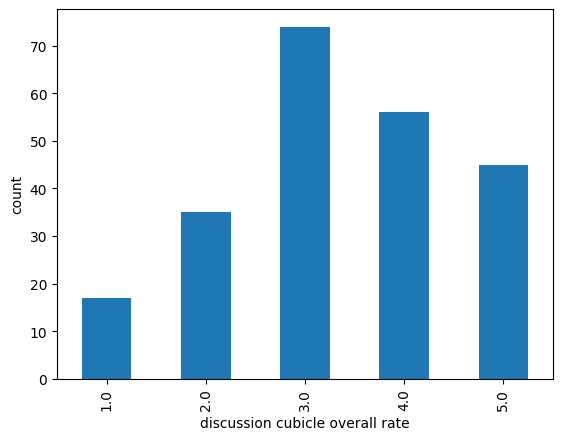

In [196]:
# visualise distribution of each furniture (before fillna)
discussion_counts = df['discussion_cubicles_rate'].explode().value_counts().sort_index()

discussion_counts.plot(kind='bar')
plt.xlabel('discussion cubicle overall rate')
plt.ylabel('count')
plt.show()


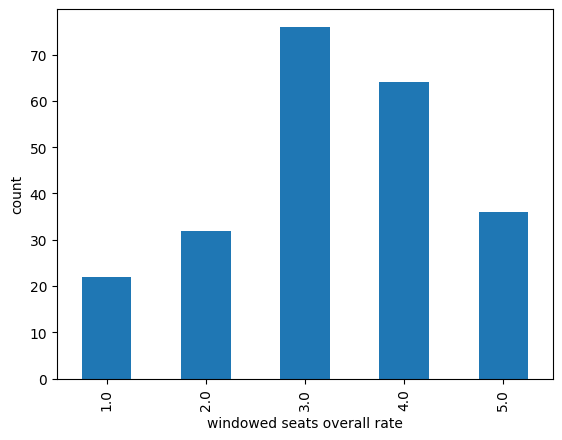

In [197]:
windowed_counts = df['windowed_rate'].explode().value_counts().sort_index()

windowed_counts.plot(kind='bar')
plt.xlabel('windowed seats overall rate')
plt.ylabel('count')
plt.show()

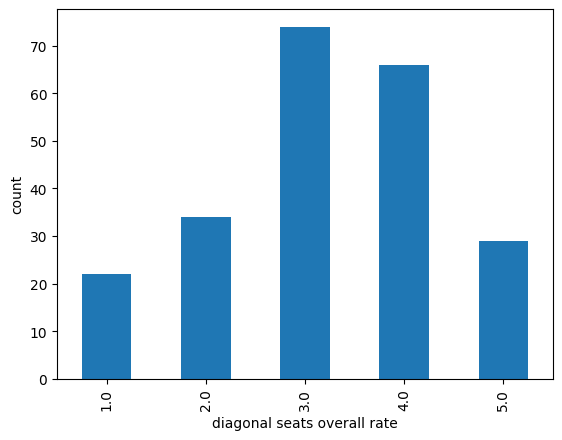

In [198]:
diagonal_counts = df['diagonal_rate'].explode().value_counts().sort_index()

diagonal_counts.plot(kind='bar')
plt.xlabel('diagonal seats overall rate')
plt.ylabel('count')
plt.show()

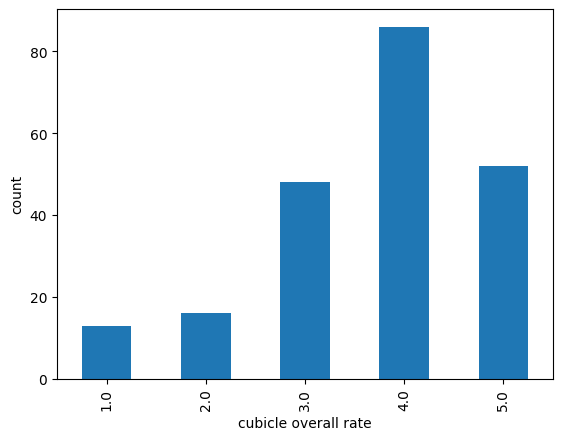

In [199]:
cubicle_counts = df['cubicle_rate'].explode().value_counts().sort_index()

cubicle_counts.plot(kind='bar')
plt.xlabel('cubicle overall rate')
plt.ylabel('count')
plt.show()

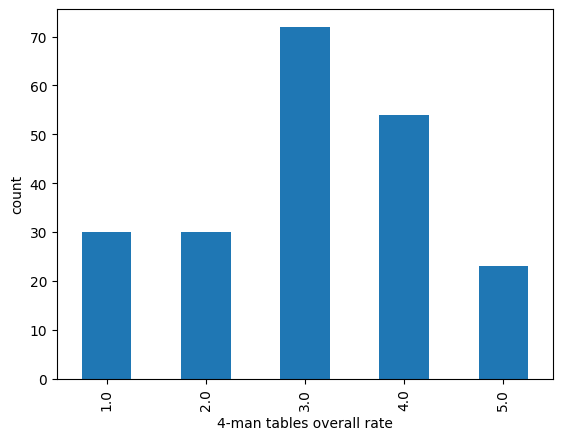

In [200]:
four_man_counts = df['4-man_rate'].explode().value_counts().sort_index()

four_man_counts.plot(kind='bar')
plt.xlabel('4-man tables overall rate')
plt.ylabel('count')
plt.show()

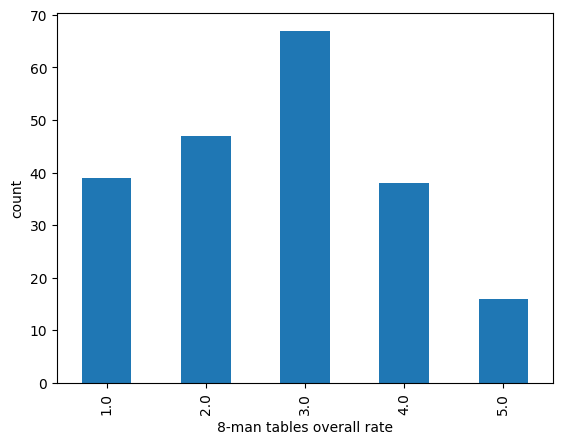

In [201]:
eight_man_counts = df['8-man_rate'].explode().value_counts().sort_index()

eight_man_counts.plot(kind='bar')
plt.xlabel('8-man tables overall rate')
plt.ylabel('count')
plt.show()

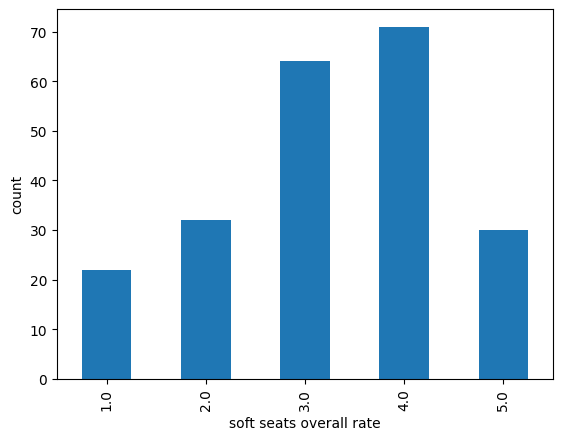

In [202]:
soft_counts = df['soft_rate'].explode().value_counts().sort_index()

soft_counts.plot(kind='bar')
plt.xlabel('soft seats overall rate')
plt.ylabel('count')
plt.show()

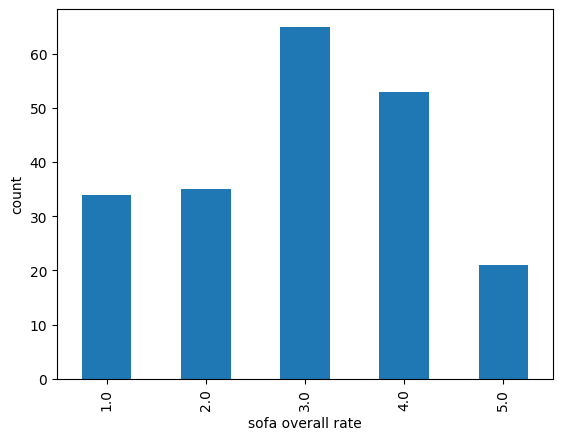

In [203]:
sofa_counts = df['sofa_rate'].explode().value_counts().sort_index()

sofa_counts.plot(kind='bar')
plt.xlabel('sofa overall rate')
plt.ylabel('count')
plt.show()

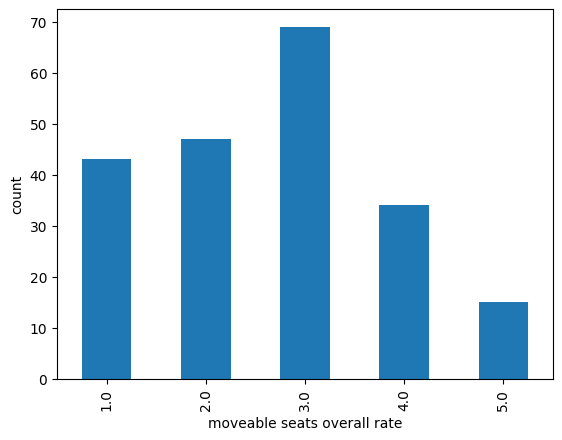

In [204]:
moveable_counts = df['moveable_rate'].explode().value_counts().sort_index()

moveable_counts.plot(kind='bar')
plt.xlabel('moveable seats overall rate')
plt.ylabel('count')
plt.show()

In [205]:
dfdiscussion = pd.DataFrame({'discussion cubicles' : discussion_counts/discussion_counts.sum()})
dfwindowed = pd.DataFrame({'windowed seats' : windowed_counts/windowed_counts.sum()})
dfdiagonal = pd.DataFrame({'diagonal seats' : diagonal_counts/diagonal_counts.sum()})
dfcubicle = pd.DataFrame({'cubicle seats' : cubicle_counts/cubicle_counts.sum()})
dffour_man = pd.DataFrame({'4-man tables' : four_man_counts/four_man_counts.sum()})
dfeight_man = pd.DataFrame({'8-man tables' : eight_man_counts/eight_man_counts.sum()})
dfsoft = pd.DataFrame({'soft seats' : soft_counts/soft_counts.sum()})
dfsofa = pd.DataFrame({'sofa' : sofa_counts/sofa_counts.sum()})
dfmoveable = pd.DataFrame({'moveable seats' : moveable_counts/moveable_counts.sum()})
dist_furniture_before = pd.concat([dfdiscussion, dfwindowed, dfdiagonal, dfcubicle, dffour_man, dfeight_man, dfsoft, dfsofa, dfmoveable],axis=1)
dist_furniture_before.to_csv('survey_data/dist_furniture_before.csv', index=True)

In [206]:
# # fill NA with 3 (neutral) for those that leave blank for rating
columns_to_fillna = ['lvl3_rate', 'lvl4_rate', 'lvl5_rate', 'lvl6_clb_rate', 'lvl6_wbs_rate', 'privacy_rate', 'crowd_lvl_rate', 'comfort_rate', 'scenery_rate', 'lighting_rate', 'ease_find_seat_rate', 'discussion_cubicles_rate', 'discussion_cubicles_privacy', 'discussion_cubicles_crowd', 'discussion_cubicles_comfort', 'discussion_cubicles_scenery', 'discussion_cubicles_lighting', 'discussion_cubicles_seat_finding', 'windowed_rate', 'windowed_privacy', 'windowed_crowd', 'windowed_comfort', 'windowed_scenery', 'windowed_lighting', 'windowed_seat_finding', 'diagonal_rate', 'diagonal_privacy', 'diagonal_crowd', 'diagonal_comfort', 'diagonal_scenery', 'diagonal_lighting', 'diagonal_seat_finding', 'cubicle_rate', 'cubicle_privacy', 'cubicle_crowd', 'cubicle_comfort', 'cubicle_scenery', 'cubicle_lighting', 'cubicle_seat_finding', '4-man_rate', '4-man_privacy', '4-man_crowd', '4-man_comfort', '4-man_scenery', '4-man_lighting', '4-man_seat_finding', '8-man_rate', '8-man_privacy', '8-man_crowd', '8-man_comfort', '8-man_scenery', '8-man_lighting', '8-man_seat_finding', 'soft_rate', 'soft_privacy', 'soft_crowd', 'soft_comfort', 'soft_scenery', 'soft_lighting', 'soft_seat_finding', 'sofa_rate', 'sofa_privacy', 'sofa_crowd', 'sofa_comfort', 'sofa_scenery', 'sofa_lighting', 'sofa_seat_finding', 'moveable_rate', 'moveable_privacy', 'moveable_crowd', 'moveable_comfort', 'moveable_scenery', 'moveable_lighting', 'moveable_seat_finding']
# df[columns_to_fillna] = df[columns_to_fillna].fillna(value='3')


# fill NA with neutral for those that leave blank for acceptance_share_table 
df['acceptance_share_table'] = df['acceptance_share_table'].fillna(value='neutral')

# convert all to lower case 
df = df.apply(lambda x: x.astype(str).str.lower() if x.dtype == 'O' else x)
 
# remove results where people do not visit library (visit_time does not contain am or pm)
df = df[df['visit_time'].str.contains('AM|PM', case=False, na=False, regex=True)]

# make all numeric for ratings
df[columns_to_fillna] = df[columns_to_fillna].replace('1 - least preferred', '1')
df[columns_to_fillna] = df[columns_to_fillna].replace('5 - most preferred', '5')
for col in columns_to_fillna:
    df[col] = pd.to_numeric(df[col], errors='coerce')

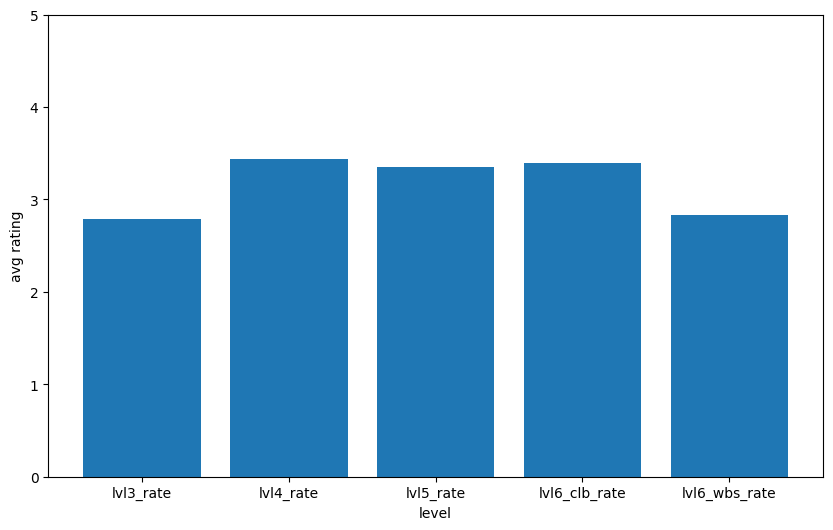

In [207]:
# visualise avg ratings for each level
rating_columns = ['lvl3_rate', 'lvl4_rate', 'lvl5_rate', 'lvl6_clb_rate', 'lvl6_wbs_rate']
lvl_avg = df[rating_columns].mean()

plt.figure(figsize=(10, 6))
plt.bar(rating_columns,lvl_avg)
plt.xlabel('level')
plt.ylabel('avg rating')
plt.ylim(0, 5)
plt.show()

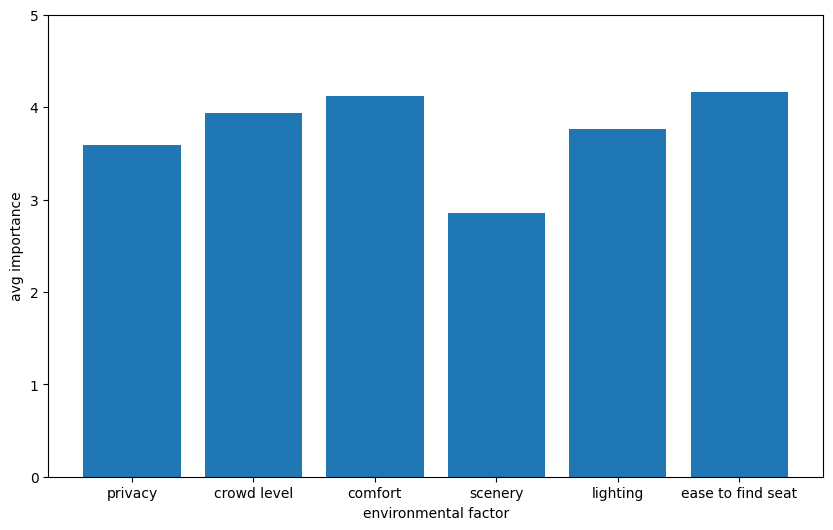

In [208]:
# visualise importance of each environmental component

env_rating = ['privacy_rate', 'crowd_lvl_rate', 'comfort_rate', 'scenery_rate', 'lighting_rate', 'ease_find_seat_rate']
env_avg = df[env_rating].mean()

env_factors = ['privacy', 'crowd level', 'comfort', 'scenery', 'lighting', 'ease to find seat']

plt.figure(figsize=(10, 6))
plt.bar(env_factors,env_avg)
plt.xlabel('environmental factor')
plt.ylabel('avg importance')
plt.ylim(0,5)
plt.show()


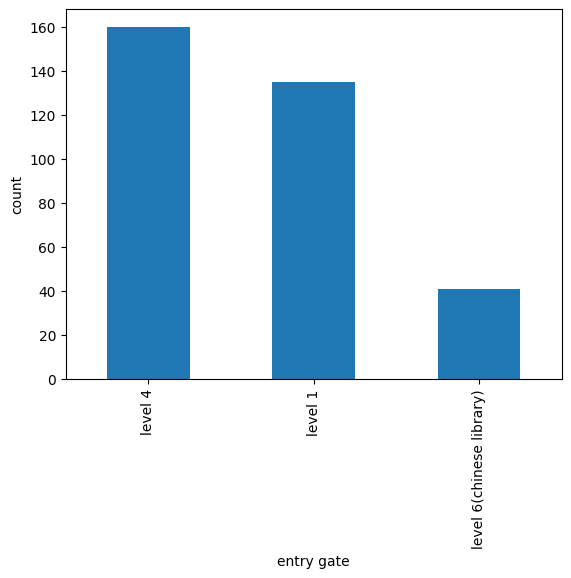

In [209]:
# visualise distribution of starting gate from survey

gate_counts = df['entry_lvl'].str.split(', ').explode().value_counts()

gate_counts.plot(kind='bar')
plt.xlabel('entry gate')
plt.ylabel('count')
plt.show()


In [210]:
gate_probs = gate_counts.sort_index()
gate_probs = gate_probs/gate_counts.values.sum()
gate_probs.index = ['clb_1_gate', 'clb_4_gate', 'wbs_6_gate']
gate_probs.name = 'probs'
gate_probs

clb_1_gate    0.401786
clb_4_gate    0.476190
wbs_6_gate    0.122024
Name: entry_lvl, dtype: float64

In [211]:
gate_probs.to_csv('survey_data/dist_entry_gates.csv')

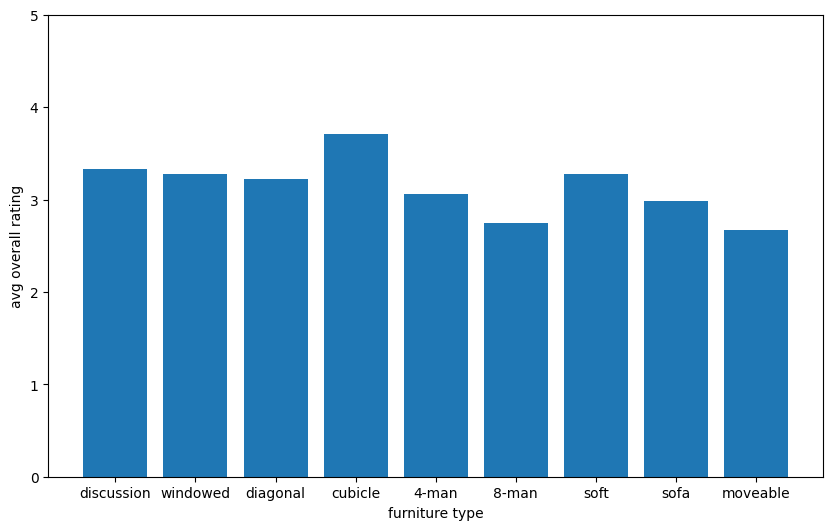

In [212]:
# visualise overall rate of each furniture

overall_rate = ['discussion_cubicles_rate', 'windowed_rate', 'diagonal_rate', 'cubicle_rate', '4-man_rate', '8-man_rate', 'soft_rate', 'sofa_rate', 'moveable_rate']
furniture_avg = df[overall_rate].mean()

furnitures = ['discussion', 'windowed', 'diagonal', 'cubicle', '4-man', '8-man', 'soft', 'sofa', 'moveable']

plt.figure(figsize=(10, 6))
plt.bar(furnitures,furniture_avg)
plt.xlabel('furniture type')
plt.ylabel('avg overall rating')
plt.ylim(0,5)
plt.show()




In [213]:
# visualise rate of each environmental factor for each furniture
# 1. same environmental factor across all furnitures
# 2. different environmental factor for each furniture

privacy_rate_cols = df.filter(like='_privacy')
crowd_lvl_rate_cols = df.filter(like='_crowd')
comfort_rate_cols = df.filter(like='_comfort')
scenery_rate_cols = df.filter(like='_scenery')
lighting_rate_cols = df.filter(like='_lighting')
seat_finding_rate_cols = df.filter(like='_seat_finding')

discussion_cubicle = df.filter(like='discussion_cubicles_')
windowed = df.filter(like='windowed_')
diagonal = df.filter(like='diagonal_')
cubicle = df.filter(like='cubicle_')
four_man = df.filter(like='4-man_')
eight_man = df.filter(like='8-man_')
soft = df.filter(like='soft_')
sofa = df.filter(like='sofa_')
moveable = df.filter(like='moveable_')

new_xlabel = ['overall rating'] + env_factors
 

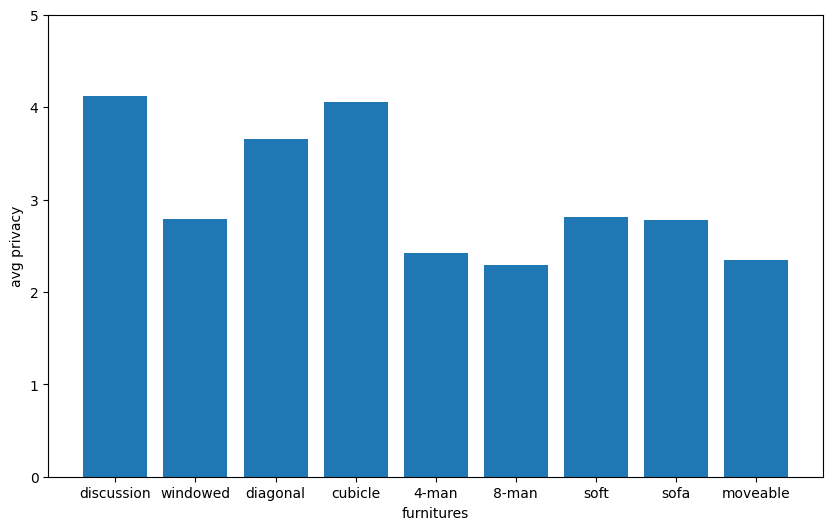

In [214]:
## avg privacy rate for all furnitures
privacy_avg = privacy_rate_cols.mean()

plt.figure(figsize=(10, 6))
plt.bar(furnitures,privacy_avg)
plt.xlabel('furnitures')
plt.ylabel('avg privacy')
plt.ylim(0,5)
plt.show()

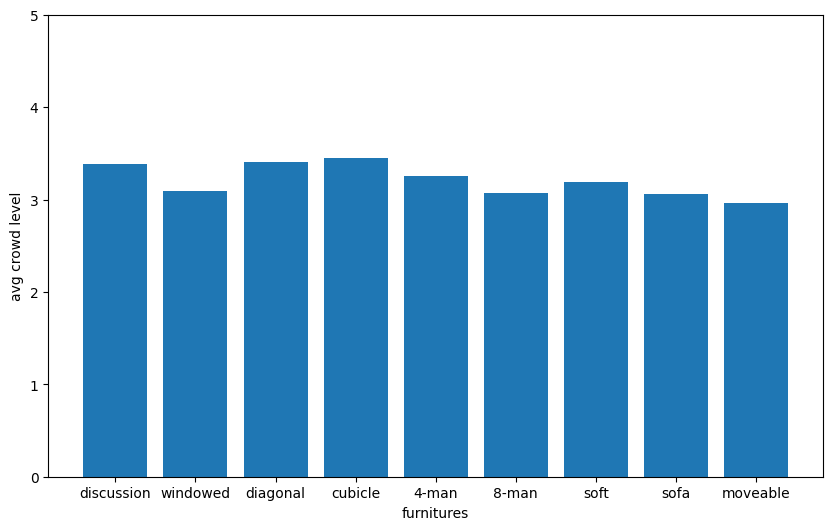

In [215]:
## avg crowd lvl rate across diff furnitures
crowd_avg = crowd_lvl_rate_cols.mean()

plt.figure(figsize=(10, 6))
plt.bar(furnitures,crowd_avg)
plt.xlabel('furnitures')
plt.ylabel('avg crowd level')
plt.ylim(0,5)
plt.show()


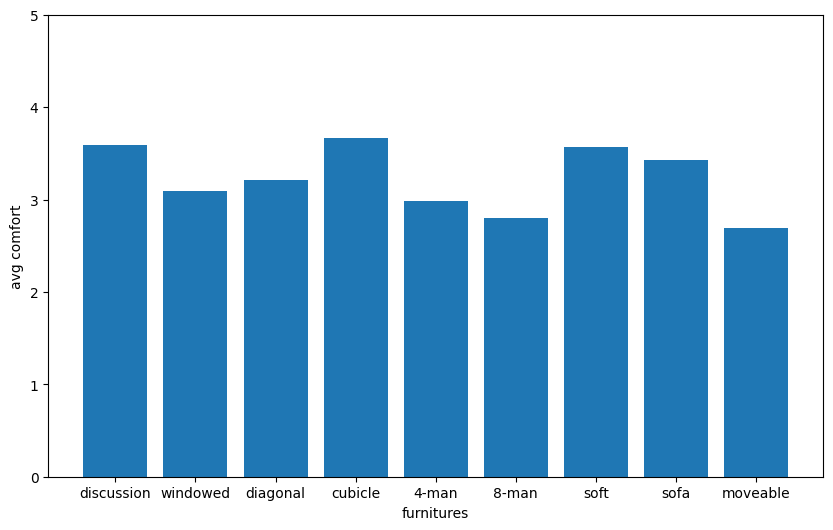

In [216]:
## avg comfort rate across diff furnitures
comfort_avg = comfort_rate_cols.mean()

plt.figure(figsize=(10, 6))
plt.bar(furnitures,comfort_avg)
plt.xlabel('furnitures')
plt.ylabel('avg comfort')
plt.ylim(0,5)
plt.show()

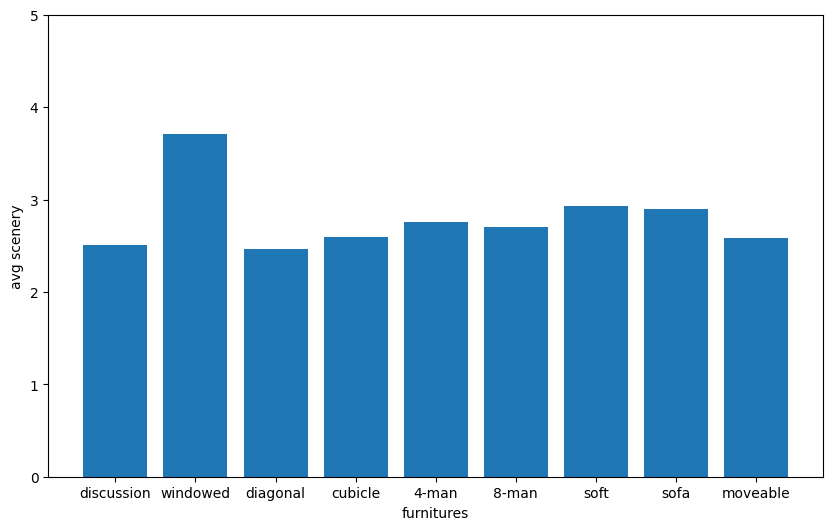

In [217]:
## avg scenery rate across diff furnitures
scenery_avg = scenery_rate_cols.mean()

plt.figure(figsize=(10, 6))
plt.bar(furnitures,scenery_avg)
plt.xlabel('furnitures')
plt.ylabel('avg scenery')
plt.ylim(0,5)
plt.show()

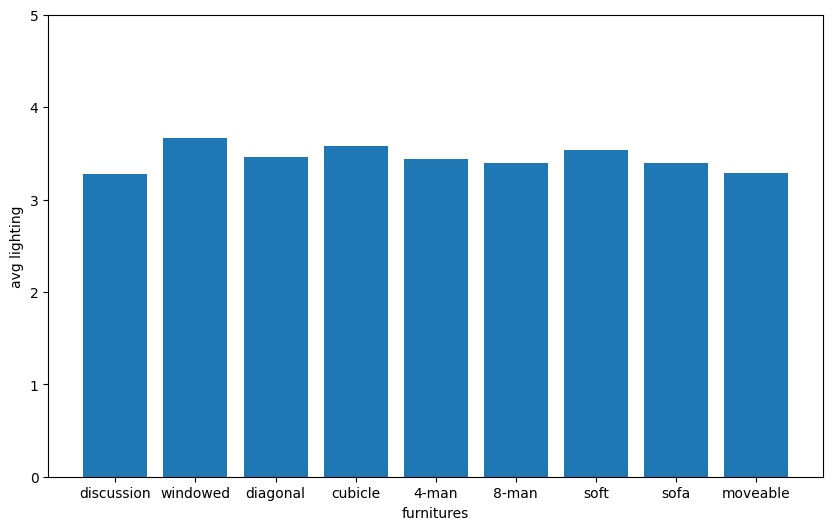

In [218]:
## avg lighting rate across diff furnitures
lighting_avg = lighting_rate_cols.mean()

plt.figure(figsize=(10, 6))
plt.bar(furnitures,lighting_avg)
plt.xlabel('furnitures')
plt.ylabel('avg lighting')
plt.ylim(0,5)
plt.show()

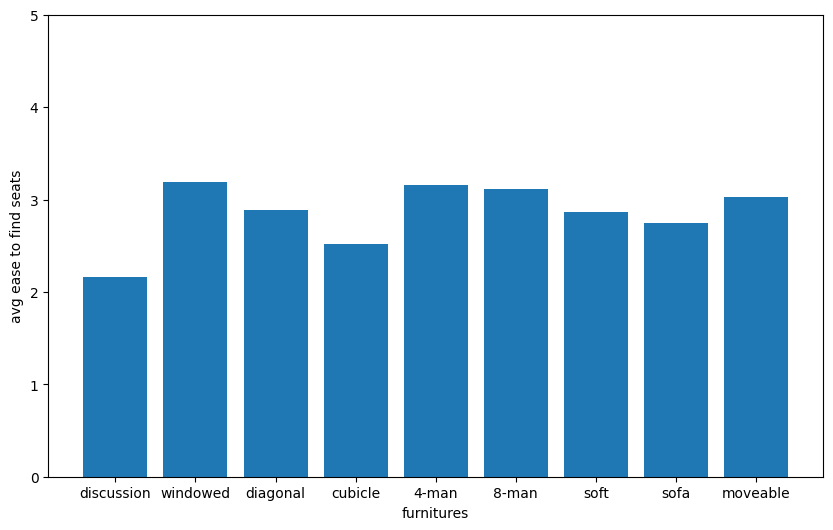

In [219]:
## avg ease to find seat rate across diff furnitures
seats_avg = seat_finding_rate_cols.mean()

plt.figure(figsize=(10, 6))
plt.bar(furnitures,seats_avg)
plt.xlabel('furnitures')
plt.ylabel('avg ease to find seats')
plt.ylim(0,5)
plt.show()

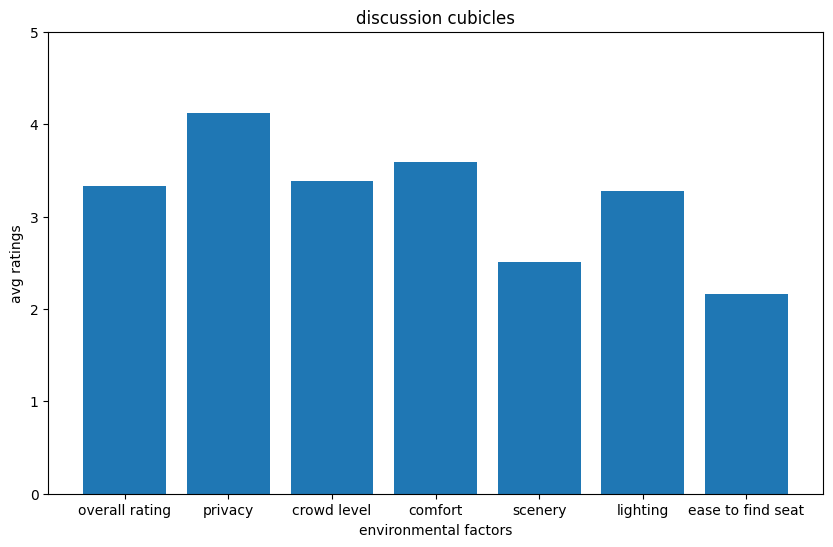

In [220]:
## avg rate of each factor for discussion cubicles
discussion_avg = discussion_cubicle.mean()

plt.figure(figsize=(10, 6))
plt.bar(new_xlabel,discussion_avg)
plt.xlabel('environmental factors')
plt.ylabel('avg ratings')
plt.title('discussion cubicles')
plt.ylim(0,5)
plt.show()

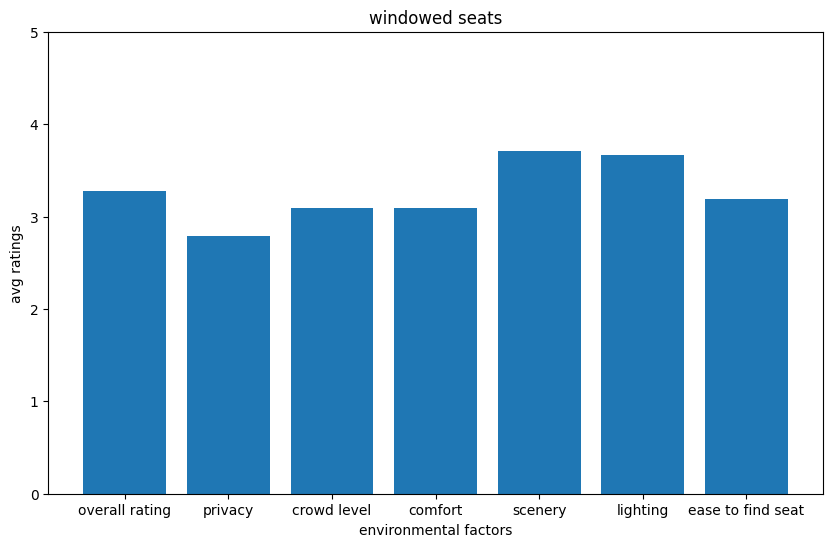

In [221]:
## avg rate of each factor for windowed seats
windowed_avg = windowed.mean()

plt.figure(figsize=(10, 6))
plt.bar(new_xlabel,windowed_avg)
plt.xlabel('environmental factors')
plt.ylabel('avg ratings')
plt.title('windowed seats')
plt.ylim(0,5)
plt.show()

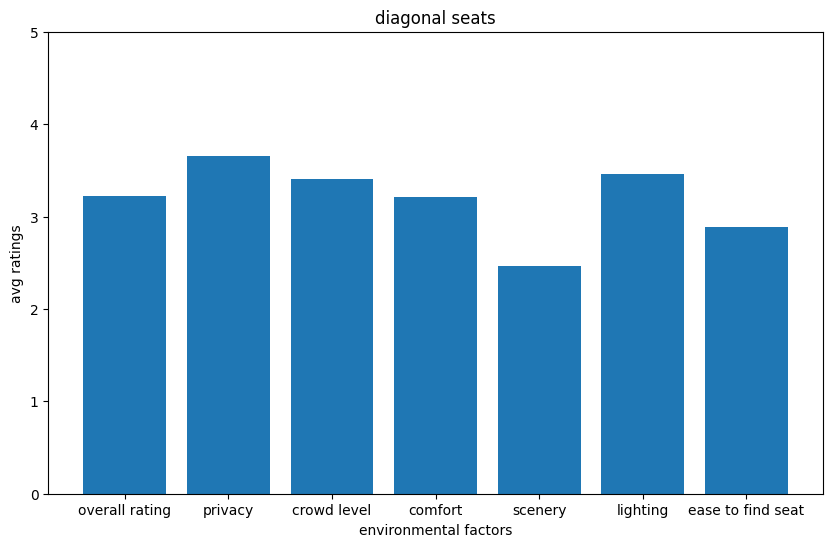

In [222]:
## avg rate of each factor for diagonal seats
diagonal_avg = diagonal.mean()

plt.figure(figsize=(10, 6))
plt.bar(new_xlabel,diagonal_avg)
plt.xlabel('environmental factors')
plt.ylabel('avg ratings')
plt.title('diagonal seats')
plt.ylim(0,5)
plt.show()

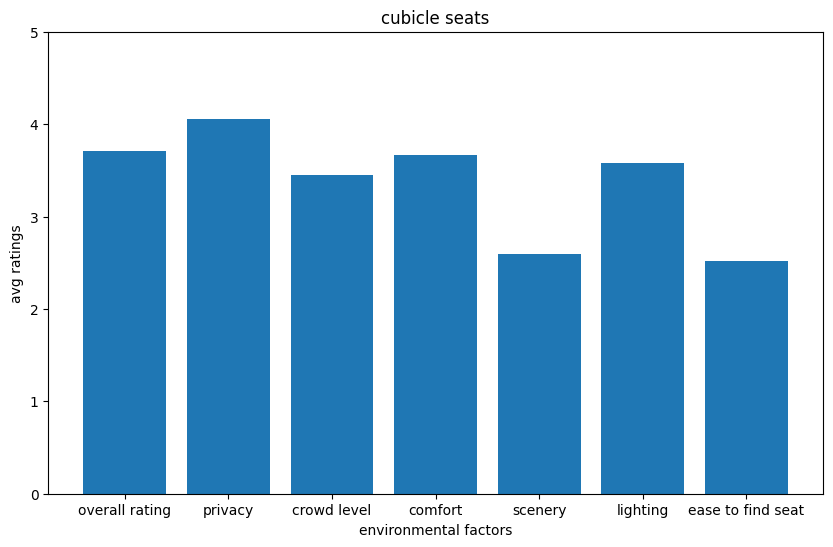

In [223]:
## avg rate of each factor for cubicle seats
cubicle_avg = cubicle.mean()

plt.figure(figsize=(10, 6))
plt.bar(new_xlabel,cubicle_avg)
plt.xlabel('environmental factors')
plt.ylabel('avg ratings')
plt.title('cubicle seats')
plt.ylim(0,5)
plt.show()

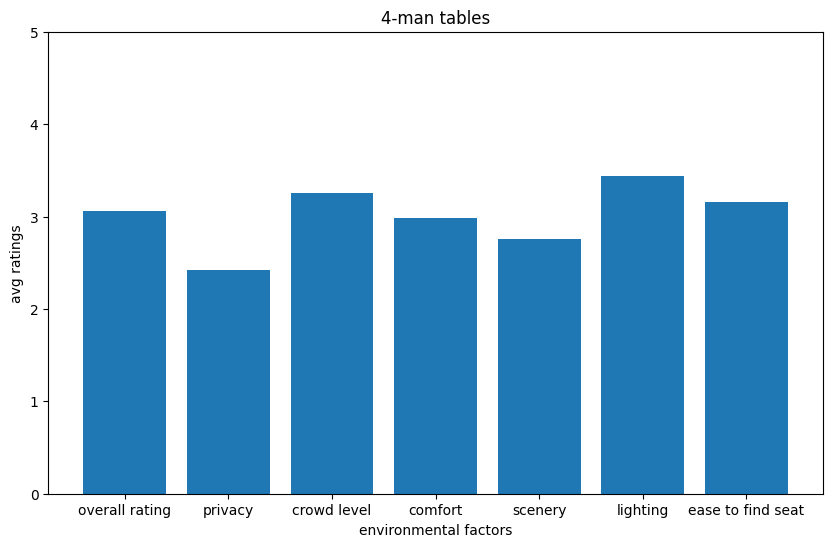

In [224]:
## avg rate of each factor for 4-man tables
four_man_avg = four_man.mean()

plt.figure(figsize=(10, 6))
plt.bar(new_xlabel,four_man_avg)
plt.xlabel('environmental factors')
plt.ylabel('avg ratings')
plt.title('4-man tables')
plt.ylim(0,5)
plt.show()

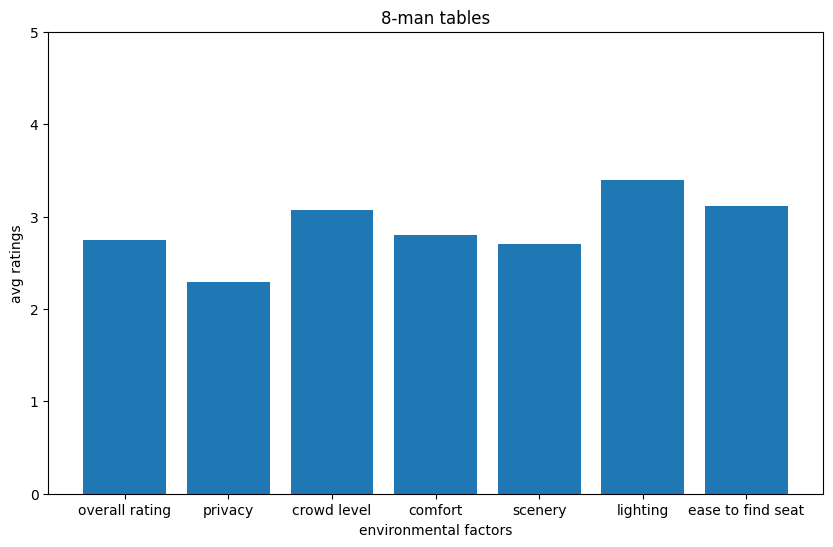

In [225]:
## avg rate of each factor for 8-man tables
eight_man_avg = eight_man.mean()

plt.figure(figsize=(10, 6))
plt.bar(new_xlabel,eight_man_avg)
plt.xlabel('environmental factors')
plt.ylabel('avg ratings')
plt.title('8-man tables')
plt.ylim(0,5)
plt.show()

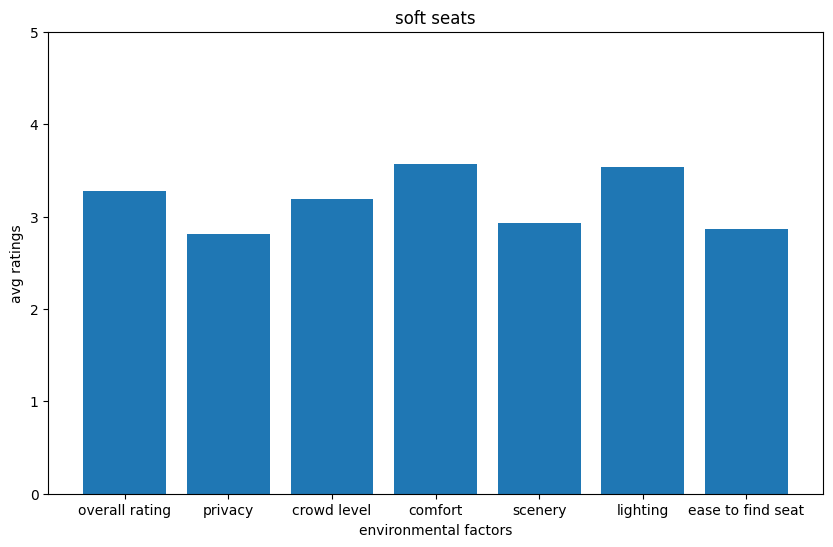

In [226]:
## avg rate of each factor for soft seats
soft_avg = soft.mean()

plt.figure(figsize=(10, 6))
plt.bar(new_xlabel,soft_avg)
plt.xlabel('environmental factors')
plt.ylabel('avg ratings')
plt.title('soft seats')
plt.ylim(0,5)
plt.show()

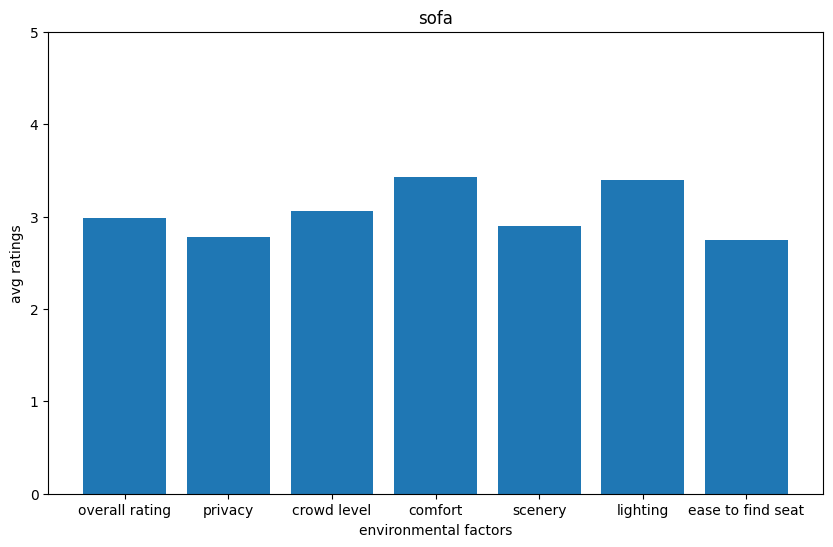

In [227]:
## avg rate of each factor for sofa
sofa_avg = sofa.mean()

plt.figure(figsize=(10, 6))
plt.bar(new_xlabel,sofa_avg)
plt.xlabel('environmental factors')
plt.ylabel('avg ratings')
plt.title('sofa')
plt.ylim(0,5)
plt.show()

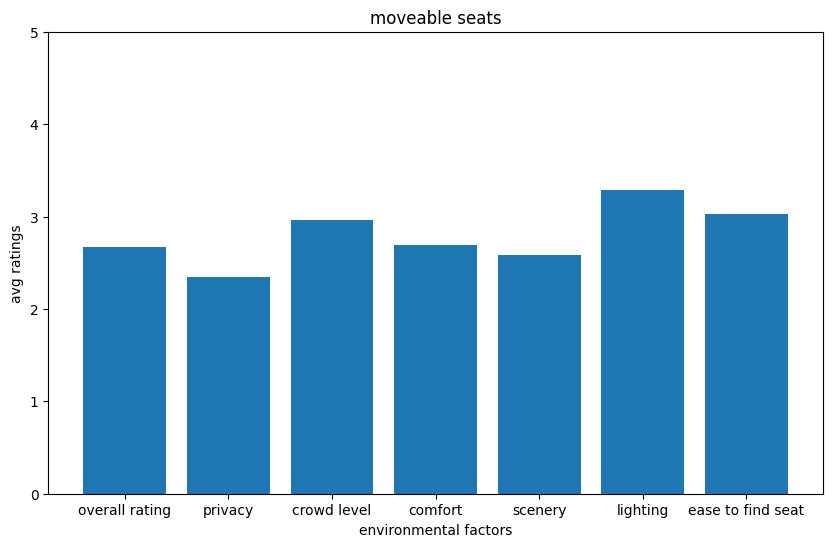

In [228]:
## avg rate of each factor for moveable seats
moveable_avg = moveable.mean()

plt.figure(figsize=(10, 6))
plt.bar(new_xlabel,moveable_avg)
plt.xlabel('environmental factors')
plt.ylabel('avg ratings')
plt.title('moveable seats')
plt.ylim(0,5)
plt.show()

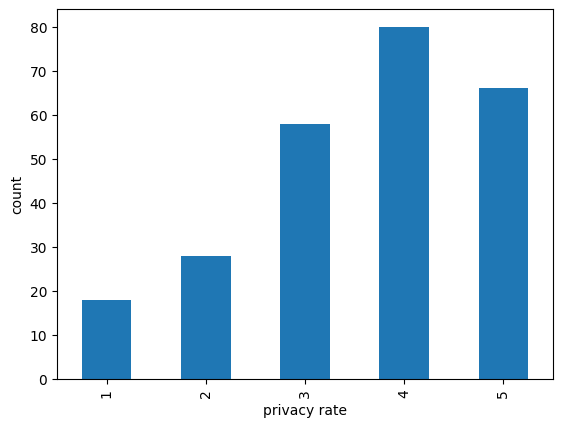

In [229]:
# visualise distribution of each feature
## i.e. the number of people giving certain rate for certain environmental factor
privacy_counts = df['privacy_rate'].explode().value_counts().sort_index()

privacy_counts.plot(kind='bar')
plt.xlabel('privacy rate')
plt.ylabel('count')
plt.show()

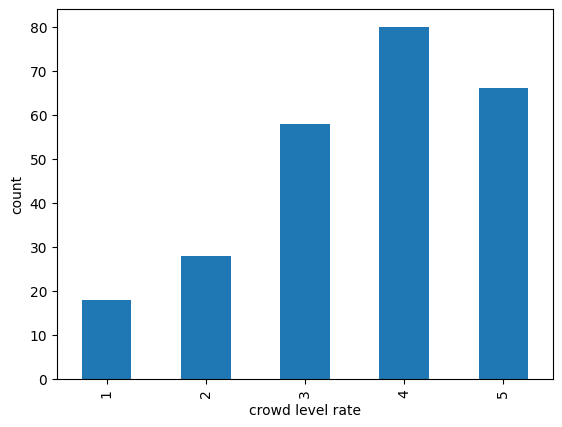

In [230]:
crowd_counts = df['crowd_lvl_rate'].explode().value_counts().sort_index()

privacy_counts.plot(kind='bar')
plt.xlabel('crowd level rate')
plt.ylabel('count')
plt.show()

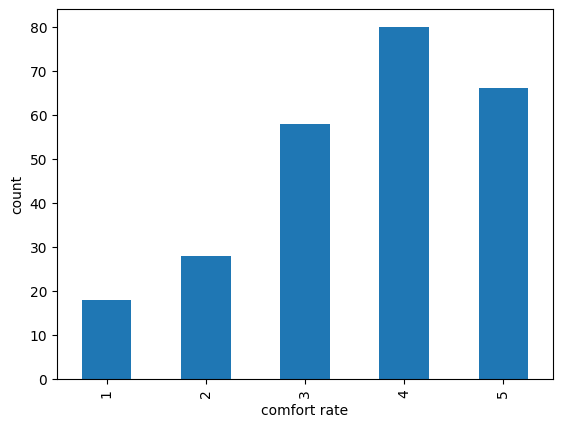

In [231]:
comfort_counts = df['comfort_rate'].explode().value_counts().sort_index()

privacy_counts.plot(kind='bar')
plt.xlabel('comfort rate')
plt.ylabel('count')
plt.show()

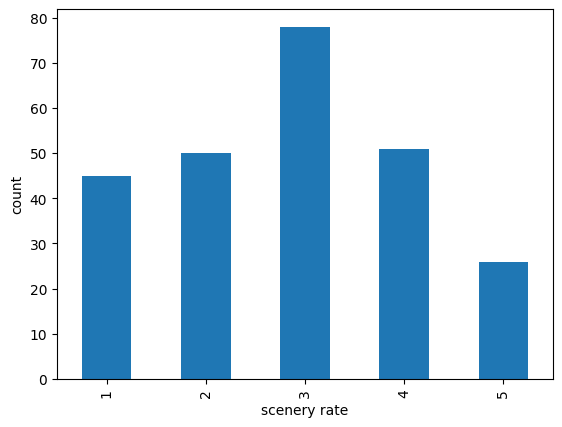

In [232]:
scenery_counts = df['scenery_rate'].explode().value_counts().sort_index()

scenery_counts.plot(kind='bar')
plt.xlabel('scenery rate')
plt.ylabel('count')
plt.show()

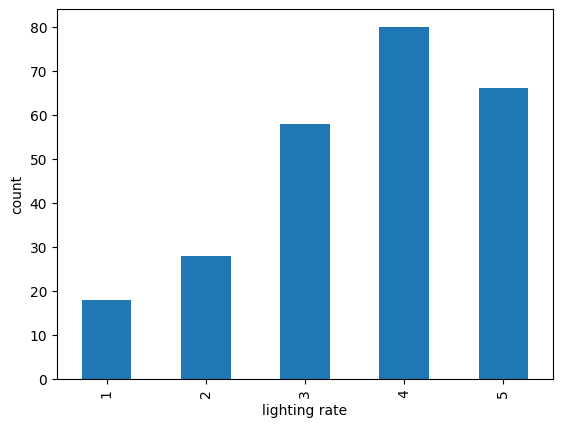

In [233]:
lighting_counts = df['lighting_rate'].explode().value_counts().sort_index()

privacy_counts.plot(kind='bar')
plt.xlabel('lighting rate')
plt.ylabel('count')
plt.show()

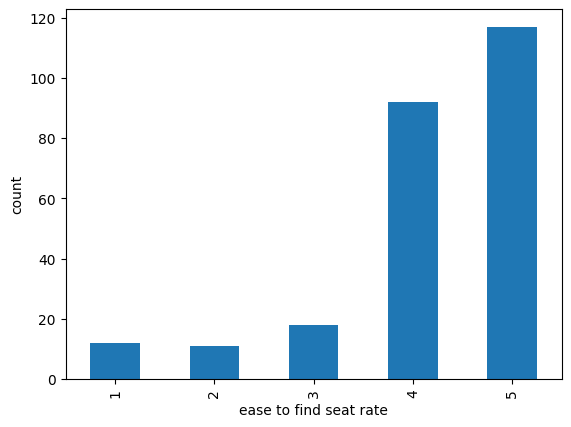

In [234]:
ease_counts = df['ease_find_seat_rate'].explode().value_counts().sort_index()

ease_counts.plot(kind='bar')
plt.xlabel('ease to find seat rate')
plt.ylabel('count')
plt.show()

In [235]:
# create new table of col = rate row = env factors
total = len(df)
privacy = pd.DataFrame({'privacy' : privacy_counts/total})
comfort = pd.DataFrame({'comfort' : comfort_counts/total})
crowd = pd.DataFrame({'crowd_level' : crowd_counts/total})
scenery = pd.DataFrame({'scenery' : scenery_counts/total})
lighting = pd.DataFrame({'lighting' : lighting_counts/total})
ease_find_seat = pd.DataFrame({'ease to find seats' : ease_counts/total})
dist_factors = pd.concat([privacy, comfort, crowd, scenery, lighting, ease_find_seat],axis=1)
dist_factors.columns = ['privacy', 'comfort', 'crowd_level', 'scenery', 'lighting', 'ease_to_find']
dist_factors.to_csv('survey_data/dist_factors.csv', index=True)

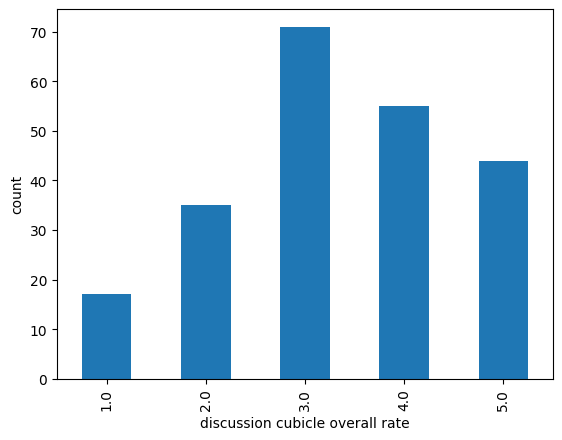

In [236]:
## visualise distribution of each furniture (after fillna)
discussion_counts = df['discussion_cubicles_rate'].explode().value_counts().sort_index()

discussion_counts.plot(kind='bar')
plt.xlabel('discussion cubicle overall rate')
plt.ylabel('count')
plt.show()

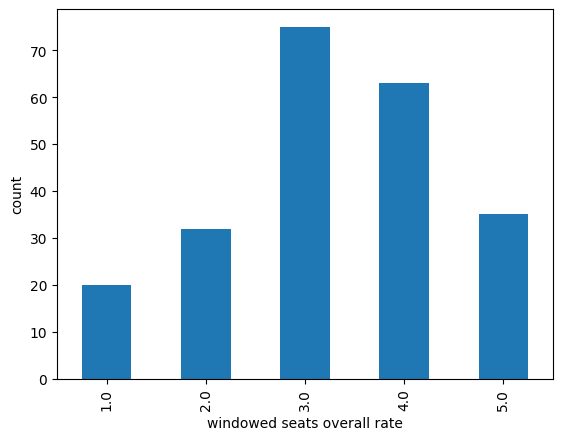

In [237]:
windowed_counts = df['windowed_rate'].explode().value_counts().sort_index()

windowed_counts.plot(kind='bar')
plt.xlabel('windowed seats overall rate')
plt.ylabel('count')
plt.show()

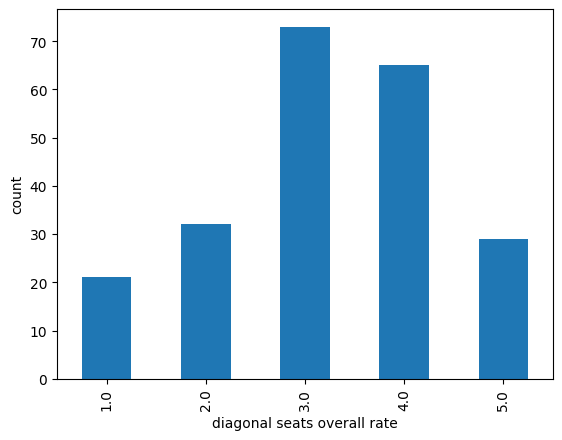

In [238]:
diagonal_counts = df['diagonal_rate'].explode().value_counts().sort_index()

diagonal_counts.plot(kind='bar')
plt.xlabel('diagonal seats overall rate')
plt.ylabel('count')
plt.show()

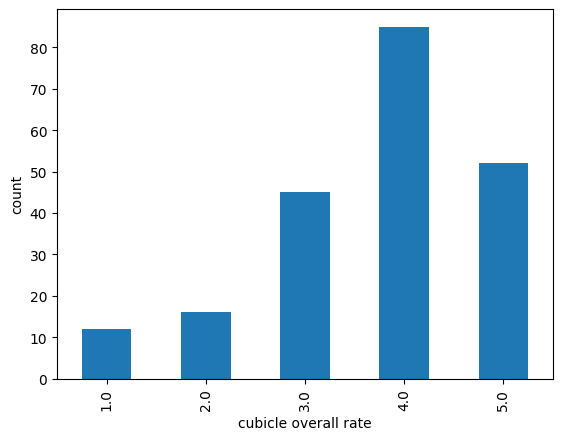

In [239]:
cubicle_counts = df['cubicle_rate'].explode().value_counts().sort_index()

cubicle_counts.plot(kind='bar')
plt.xlabel('cubicle overall rate')
plt.ylabel('count')
plt.show()

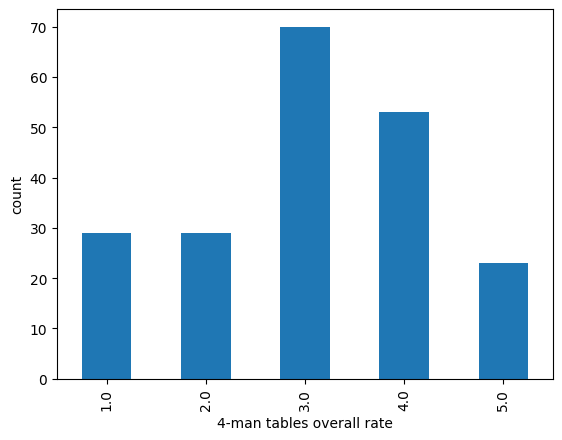

In [240]:
four_man_counts = df['4-man_rate'].explode().value_counts().sort_index()

four_man_counts.plot(kind='bar')
plt.xlabel('4-man tables overall rate')
plt.ylabel('count')
plt.show()

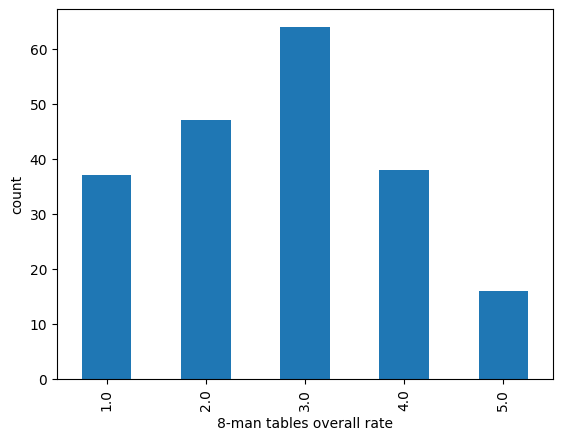

In [241]:
eight_man_counts = df['8-man_rate'].explode().value_counts().sort_index()

eight_man_counts.plot(kind='bar')
plt.xlabel('8-man tables overall rate')
plt.ylabel('count')
plt.show()

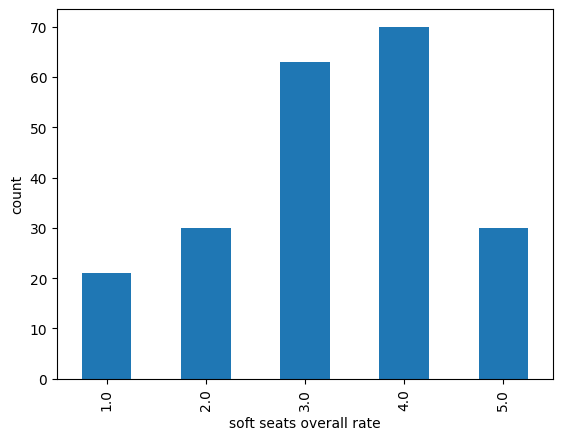

In [242]:
soft_counts = df['soft_rate'].explode().value_counts().sort_index()

soft_counts.plot(kind='bar')
plt.xlabel('soft seats overall rate')
plt.ylabel('count')
plt.show()

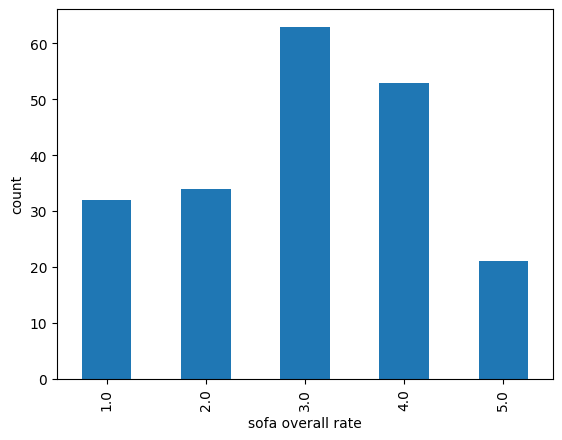

In [243]:
sofa_counts = df['sofa_rate'].explode().value_counts().sort_index()

sofa_counts.plot(kind='bar')
plt.xlabel('sofa overall rate')
plt.ylabel('count')
plt.show()

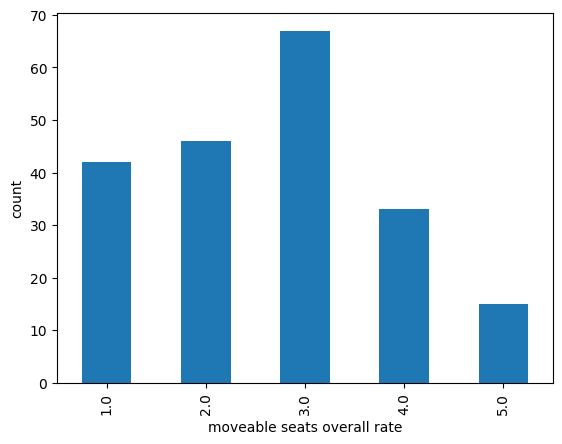

In [244]:
moveable_counts = df['moveable_rate'].explode().value_counts().sort_index()

moveable_counts.plot(kind='bar')
plt.xlabel('moveable seats overall rate')
plt.ylabel('count')
plt.show()

In [245]:
dfdiscussion = pd.DataFrame({'discussion cubicles' : discussion_counts/discussion_counts.sum()})
dfwindowed = pd.DataFrame({'windowed seats' : windowed_counts/windowed_counts.sum()})
dfdiagonal = pd.DataFrame({'diagonal seats' : diagonal_counts/diagonal_counts.sum()})
dfcubicle = pd.DataFrame({'cubicle seats' : cubicle_counts/cubicle_counts.sum()})
dffour_man = pd.DataFrame({'4-man tables' : four_man_counts/four_man_counts.sum()})
dfeight_man = pd.DataFrame({'8-man tables' : eight_man_counts/eight_man_counts.sum()})
dfsoft = pd.DataFrame({'soft seats' : soft_counts/soft_counts.sum()})
dfsofa = pd.DataFrame({'sofa' : sofa_counts/sofa_counts.sum()})
dfmoveable = pd.DataFrame({'moveable seats' : moveable_counts/moveable_counts.sum()})
dist_furniture_after = pd.concat([dfdiscussion, dfwindowed, dfdiagonal, dfcubicle, dffour_man, dfeight_man, dfsoft, dfsofa, dfmoveable],axis=1)
dist_furniture_after.to_csv('survey_data/dist_furniture_after.csv', index=True)

In [246]:
dist_furniture_after

,discussion cubicles,windowed seats,diagonal seats,cubicle seats,4-man tables,8-man tables,soft seats,sofa,moveable seats
1.0,0.076577,0.088889,0.095455,0.057143,0.142157,0.183168,0.098131,0.157635,0.206897
2.0,0.157658,0.142222,0.145455,0.076190,0.142157,0.232673,0.140187,0.167488,0.226601
3.0,0.319820,0.333333,0.331818,0.214286,0.343137,0.316832,0.294393,0.310345,0.330049
4.0,0.247748,0.280000,0.295455,0.404762,0.259804,0.188119,0.327103,0.261084,0.162562
5.0,0.198198,0.155556,0.131818,0.247619,0.112745,0.079208,0.140187,0.103448,0.073892


In [247]:
new_df = df.copy()
new_df['usual_amt_time'].unique()

array(['4 hrs', 'up to 1 hour', 'up to 2 hours', 'up to 6 hours',
       'up to 4 hours', 'more than 6 hours',
       'depends, more than 6 hours if it’s near exam season but only 1-2 hours if it’s in between tutorials',
       'nil', '0'], dtype=object)

In [248]:
#clean data for usual time
new_df['usual_amt_time'].fillna(0, inplace=True)
dic = {'i dont go': '0', 'nil' : '0', 'depends, more than 6 hours if it’s near exam season but only 1-2 hours if it’s in between tutorials': 'up to 2 hours', 'Few minutes to meet friends for lunch' : '0', 0 : '0', '4 hrs': 'up to 4 hours'}
new_df['usual_amt_time'] = new_df['usual_amt_time'].replace(dic)
new_df['usual_amt_time'].unique()

array(['up to 4 hours', 'up to 1 hour', 'up to 2 hours', 'up to 6 hours',
       'more than 6 hours', '0'], dtype=object)

Text(0, 0.5, 'Counts')

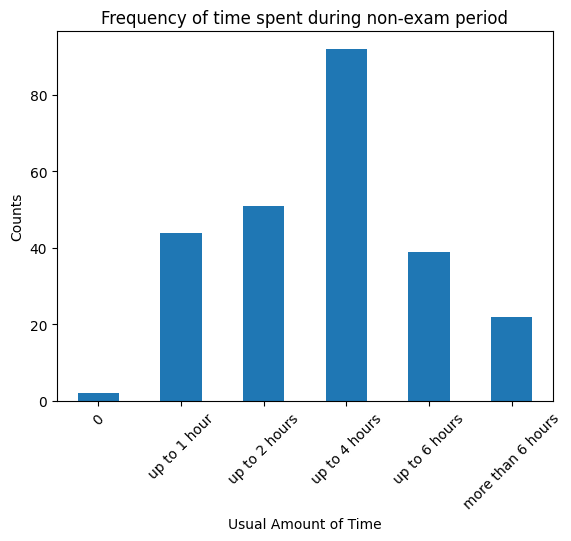

In [249]:
duration_counts = new_df['usual_amt_time'].value_counts().reindex(['0', 'up to 1 hour', 'up to 2 hours', 'up to 4 hours', 'up to 6 hours', 'more than 6 hours'])
duration_counts.plot(kind='bar')
plt.title('Frequency of time spent during non-exam period')
plt.xlabel('Usual Amount of Time')
plt.xticks(rotation=45)
plt.ylabel('Counts')

In [250]:
new_df['exam_amt_time'].unique()

array(['6 hrs', 'less than 2hrs', 'up to 1 hour', 'up to 4 hours',
       'up to 6 hours', 'more than 6 hours', 'up to 2 hours', 'none',
       'never go there to study', 'crowded so don’t go',
       'i study at home', 'up to 10 cuz i need stress relief', 'nil',
       'nan', 'not really', '0'], dtype=object)

In [251]:
#clean data for exam period
new_df['exam_amt_time'].fillna(0, inplace=True)
replacement = {'6 hrs' : 'up to 6 hours', 'less than 2hrs': 'up to 2 hours', 'never go there to study': '0', 'crowded so don’t go': '0','i study at home': '0', 'up to 10 cuz i need stress relief' : '0', 'not really' : '0', 'nan' : '0', 'nil' : '0', 0 : '0'}
new_df['exam_amt_time'] = new_df['exam_amt_time'].replace(replacement)
new_df['exam_amt_time'].unique()

array(['up to 6 hours', 'up to 2 hours', 'up to 1 hour', 'up to 4 hours',
       'more than 6 hours', 'none', '0'], dtype=object)

Text(0, 0.5, 'Counts')

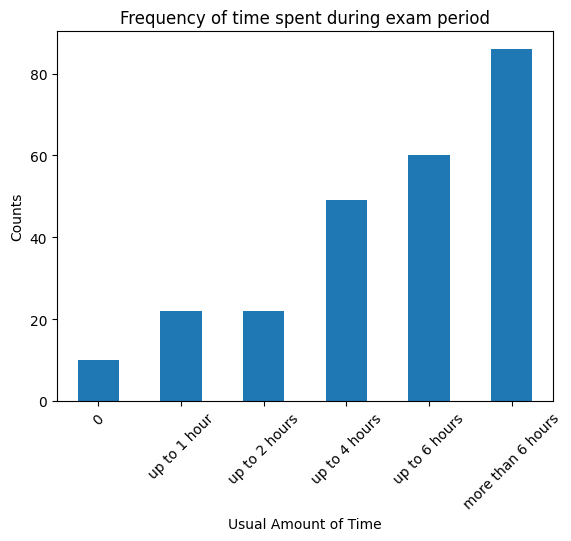

In [252]:
duration_counts_exam = new_df['exam_amt_time'].value_counts().reindex(['0', 'up to 1 hour', 'up to 2 hours', 'up to 4 hours', 'up to 6 hours', 'more than 6 hours'])
duration_counts_exam.plot(kind='bar')
plt.title('Frequency of time spent during exam period')
plt.xlabel('Usual Amount of Time')
plt.xticks(rotation=45)
plt.ylabel('Counts')

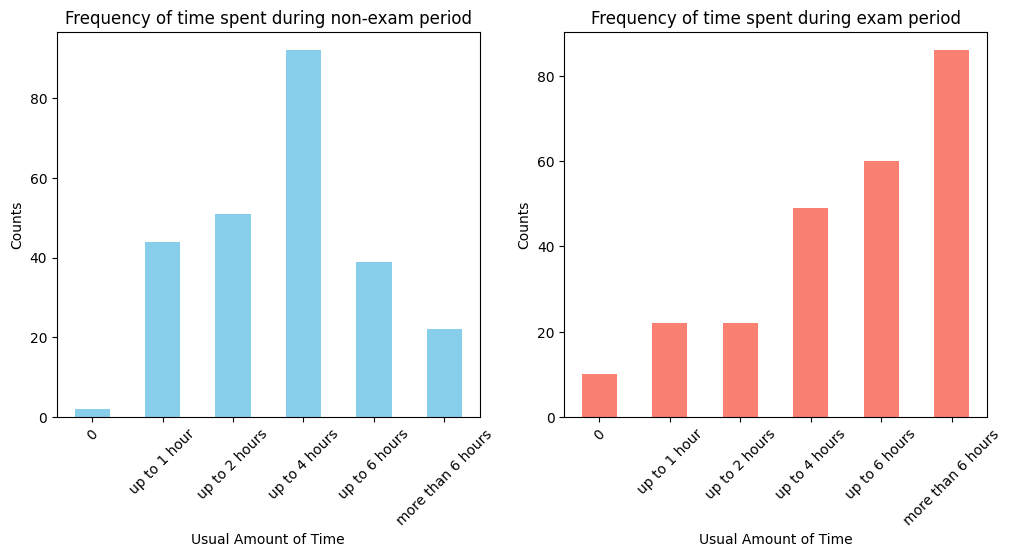

In [253]:
#comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
duration_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Frequency of time spent during non-exam period')
axes[0].set_xlabel('Usual Amount of Time')
axes[0].set_ylabel('Counts')
axes[0].tick_params(axis='x', rotation=45)

duration_counts_exam = new_df['exam_amt_time'].value_counts().reindex(['0', 'up to 1 hour', 'up to 2 hours', 'up to 4 hours', 'up to 6 hours', 'more than 6 hours'])
duration_counts_exam.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Frequency of time spent during exam period')
axes[1].set_xlabel('Usual Amount of Time')
axes[1].set_ylabel('Counts')
axes[1].tick_params(axis='x', rotation=45)

In [254]:
#convert to probability distribtuion
total_entries_exam = duration_counts_exam.sum()
probability_exam = duration_counts_exam / total_entries_exam
total_entries_usual = duration_counts.sum()
probability_usual = duration_counts / total_entries_usual

In [255]:
probability_exam

0                    0.040161
up to 1 hour         0.088353
up to 2 hours        0.088353
up to 4 hours        0.196787
up to 6 hours        0.240964
more than 6 hours    0.345382
Name: exam_amt_time, dtype: float64

In [256]:
probability_usual

0                    0.008
up to 1 hour         0.176
up to 2 hours        0.204
up to 4 hours        0.368
up to 6 hours        0.156
more than 6 hours    0.088
Name: usual_amt_time, dtype: float64

In [257]:
#csv file
probability_usual.to_csv('survey_data/duration_counts.csv')
probability_exam.to_csv('survey_data/duration_counts_exam.csv')